In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [15]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head(6)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

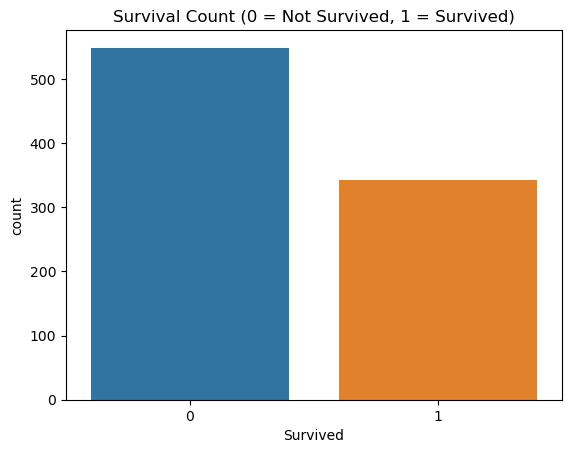

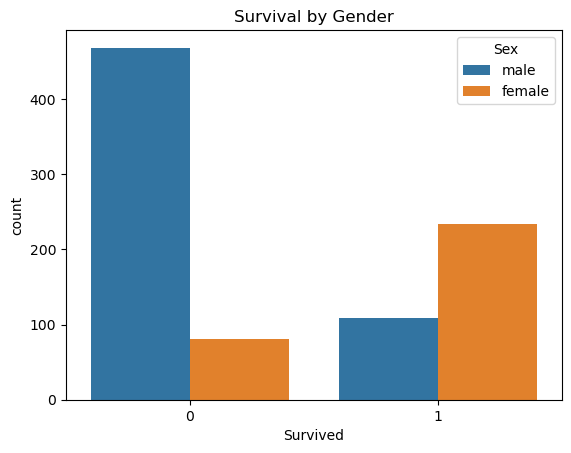

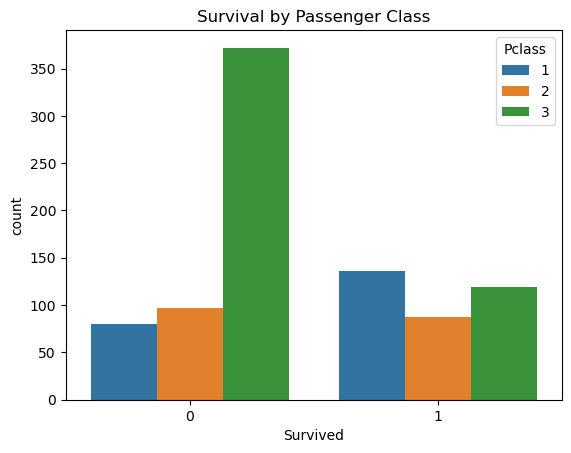

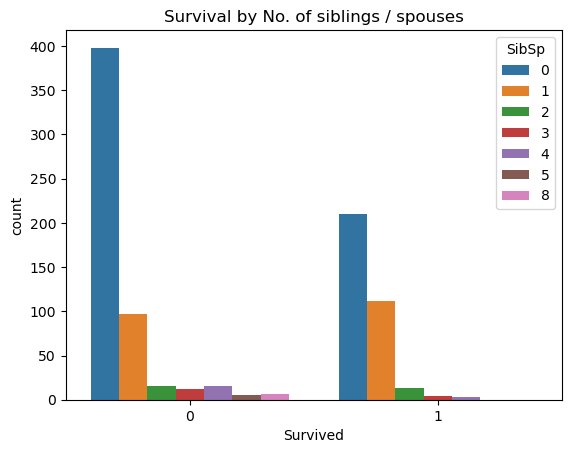

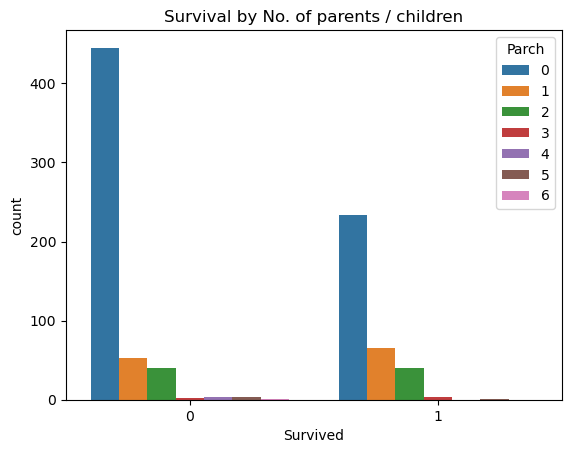

In [16]:
print(train_df.info())

print(train_df.isnull().sum())

print(train_df.describe())

sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.show()

sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

sns.countplot(x='Survived', hue='SibSp', data=train_df)
plt.title('Survival by No. of siblings / spouses')
plt.show()

sns.countplot(x='Survived', hue='Parch', data=train_df)
plt.title('Survival by No. of parents / children')
plt.show()




In [17]:
full_df = pd.concat([train_df, test_df], sort=False)

full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)
full_df['Fare'].fillna(full_df['Fare'].median(), inplace=True)

full_df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

label_encoder = LabelEncoder()
full_df['Sex'] = label_encoder.fit_transform(full_df['Sex'])  # Female = 0, Male = 1
full_df['Embarked'] = label_encoder.fit_transform(full_df['Embarked'])  # S, C, Q -> 0, 1, 2

train_df = full_df[:len(train_df)]
test_df = full_df[len(train_df):]

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']


Accuracy: 0.8268156424581006
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       105
         1.0       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
 [[93 12]
 [19 55]]


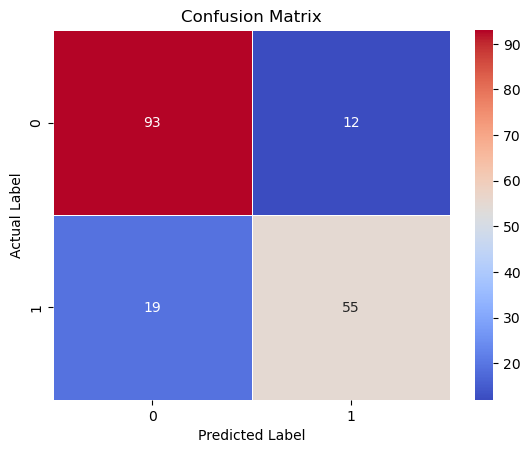

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='coolwarm',linewidths=0.5, linecolor='white')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
